In [9]:
import snap
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import leidenalg 
import igraph as ig
import networkx as nx
from collections import defaultdict
sys.path.append('../')
from src.util_data import loadNodeAttr

In [10]:
def get_pos(txt_file):
    coordinates = np.loadtxt(txt_file, delimiter = ' ')
    coordinates = coordinates[:,:2]
    return dict(zip(range(coordinates.shape[0]), coordinates))

In [11]:
G_LS174T = ig.Graph.Read_Edgelist('../data/Edgelist/LS174T_clean_EdgesList.txt', directed=True)
G_SW1222 = ig.Graph.Read_Edgelist('../data/Edgelist/SW1222_clean_EdgesList.txt', directed=True)
G_Mes = ig.Graph.Read_Edgelist('../data/Edgelist/Mesentery_clean_EdgeList.txt', directed=True)

In [12]:
part_LS = leidenalg.find_partition(G_LS174T, leidenalg.RBConfigurationVertexPartition)
part_SW = leidenalg.find_partition(G_SW1222, leidenalg.RBConfigurationVertexPartition)
part_Mes = leidenalg.find_partition(G_Mes, leidenalg.RBConfigurationVertexPartition)

In [ ]:
part_LS = leidenalg.find_partition(G_LS174T, leidenalg.ModularityVertexPartition)
part_SW = leidenalg.find_partition(G_SW1222, leidenalg.ModularityVertexPartition)
part_Mes = leidenalg.find_partition(G_Mes, leidenalg.ModularityVertexPartition)

In [4]:
lens_LS = [float(len(comm))/sum([len(comm) for comm in part_LS]) for comm in part_LS]
lens_SW = [float(len(comm))/sum([len(comm) for comm in part_SW]) for comm in part_SW]
lens_Mes = [float(len(comm))/sum([len(comm) for comm in part_Mes]) for comm in part_Mes]

In [ ]:
plt.plot(lens_LS)
plt.plot(lens_SW)
plt.plot(lens_Mes)
plt.show

In [ ]:
pd.Series(lens_LS).plot()

In [22]:
nidx2clust = [0]*18093
for i,x in enumerate(part):
    for y in x:
        nidx2clust[y] = i

In [ ]:
lens = [len(comm) for comm in part_Mes]
pd.Series(lens).plot()

In [24]:
nidx2clust_mes = [0]*388
for i,x in enumerate(part_Mes):
    for y in x:
        nidx2clust_mes[y] = i

In [ ]:
G_Mes_nx = nx.read_edgelist("../data/Edgelist/Mesentery_clean_EdgeList.txt", nodetype=int)
pos = nx.spring_layout(G_Mes_nx)
nx.draw(G_Mes_nx, node_color=nidx2clust_mes, pos = pos, node_size=40, cmap=plt.cm.Paired)

In [13]:
nidx2clust_LS = np.asarray([0]*G_LS174T.vcount())
for i,x in enumerate(part_LS):
    for y in x:
        nidx2clust_LS[y] = i


In [14]:
nidx2clust_SW = np.asarray([0]*G_SW1222.vcount())
for i,x in enumerate(part_SW):
    for y in x:
        nidx2clust_SW[y] = i

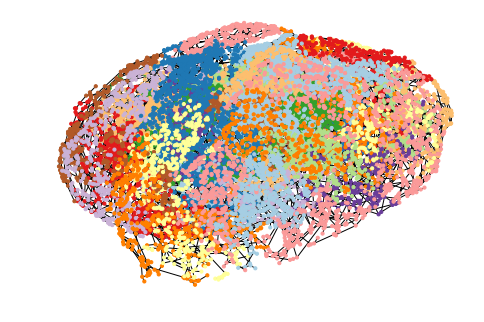

In [15]:
G_LS174T_nx = nx.read_edgelist("../data/Edgelist/LS174T_clean_EdgesList.txt", nodetype=int)
LS174T_pos = get_pos('../data/og_files/LS174T_coordinates.txt')
# print(LS174T_pos)
nx.draw(G_LS174T_nx, node_color=np.asarray(nidx2clust_LS)+1, pos = LS174T_pos, node_size=10, cmap=plt.cm.Paired)

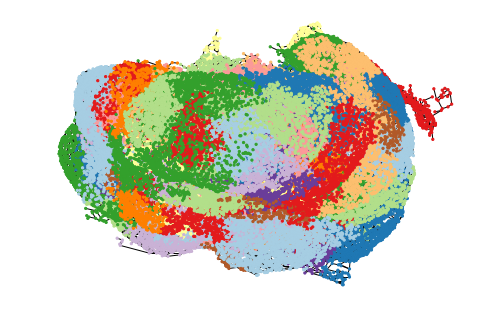

In [16]:
G_SW1222_nx = nx.read_edgelist("../data/Edgelist/SW1222_clean_EdgesList.txt", nodetype=int)
SW1222_pos = get_pos('../data/og_files/SW1222_coordinates.txt')
# print(LS174T_pos)
nx.draw(G_SW1222_nx, node_color=np.asarray(nidx2clust_SW), pos = SW1222_pos, node_size=5, cmap=plt.cm.Paired)

In [9]:
np.savetxt('LS_communities.txt', nidx2clust_LS, delimiter = ' ')
np.savetxt('SW_communities.txt', nidx2clust_SW, delimiter = ' ')

In [4]:
radii_SW = loadNodeAttr('../data/og_files/SW122_spatialGraph_RIN.txt')
radii_LS = loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt')
pressure_SW = loadNodeAttr('../data/og_files/SW122_spatialGraph_RIN.txt', attr = 'pressure')
pressure_LS = loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt', attr = 'pressure')
flow_SW = loadNodeAttr('../data/og_files/SW122_spatialGraph_RIN.txt', attr = 'flow')
flow_LS = loadNodeAttr('../data/og_files/LS174T_spatialGraph_RIN.txt', attr = 'flow')

In [5]:
community_radii_LS = defaultdict(list)
for i,node in enumerate(nidx2clust_LS):
    community_radii_LS[node].append(radii_LS[i])

NameError: name 'nidx2clust_LS' is not defined

In [6]:
community_flow_LS = defaultdict(list)
for i,node in enumerate(nidx2clust_LS):
    community_flow_LS[node].append(flow_LS[i])

NameError: name 'nidx2clust_LS' is not defined

In [ ]:
community_pressure_LS = defaultdict(list)
for i,node in enumerate(nidx2clust_LS):
    community_pressure_LS[node].append(pressure_LS[i])

In [ ]:
community_radii_SW = defaultdict(list)
for i,node in enumerate(nidx2clust_SW):
    community_radii_SW[node].append(radii_SW[i])

In [ ]:
plt.hist(radii_LS.values(), bins = np.arange(5,20,0.5))

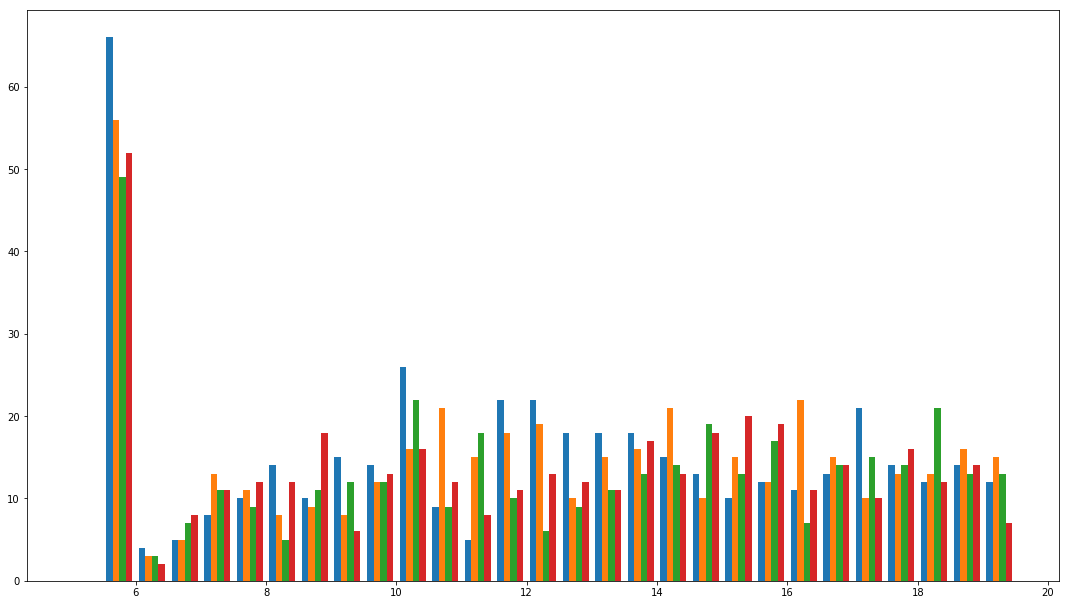

In [34]:
plt.hist(community_radii_SW.values()[6:10], bins = np.arange(5,20,0.5))
# plt.gca().set_xscale('log')
plt.gcf().set_size_inches(18.5, 10.5)

In [ ]:
plt.hist(community_radii_LS[1], bins = np.arange(5,20,0.5))
# plt.gca().set_xscale('log')
# plt.gcf().set_size_inches(18.5, 10.5)

In [ ]:
plt.hist(community_radii_LS[2], bins = np.arange(5,20,0.5))
# plt.gca().set_xscale('log')
# plt.gcf().set_size_inches(18.5, 10.5)